### Imports necesarios y carga de datos

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

# APARTADO B

In [42]:
b_cancer = datasets.load_breast_cancer()

In [43]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [44]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Correct classification Logistic  0.5 % of the data:  0.8912280701754386
Correct classification SVM       0.5 % of the data:  0.8280701754385965
Correct classification Logistic  0.7 % of the data:  0.9181286549707602
Correct classification SVM       0.7 % of the data:  0.8888888888888888
Correct classification Logistic  0.8 % of the data:  0.8859649122807017
Correct classification SVM       0.8 % of the data:  0.8771929824561403


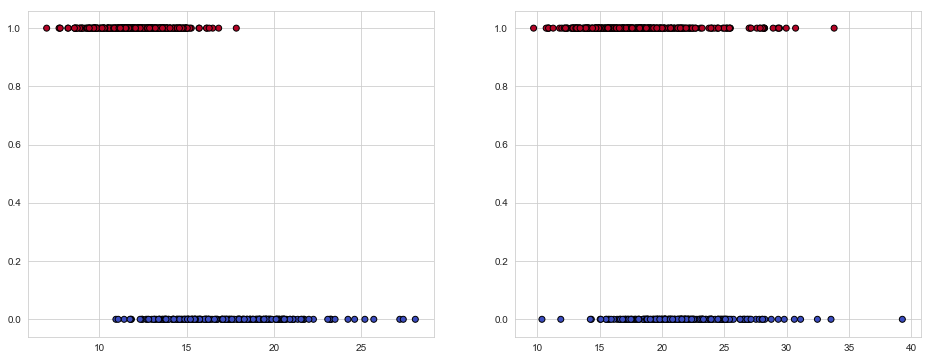

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X = b_cancer.data[:, :2]
y = b_cancer.target

n_classes = 2

fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, solver='lbfgs')

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


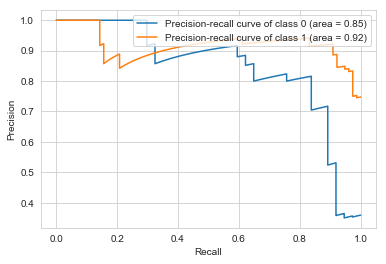

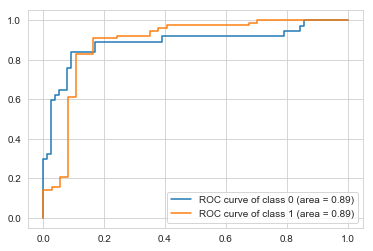

In [46]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [47]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    b_cancer = datasets.load_breast_cancer()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = b_cancer.data[:, :2]
    y = b_cancer.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('mean radius')
        ax.set_ylabel('mean texture')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


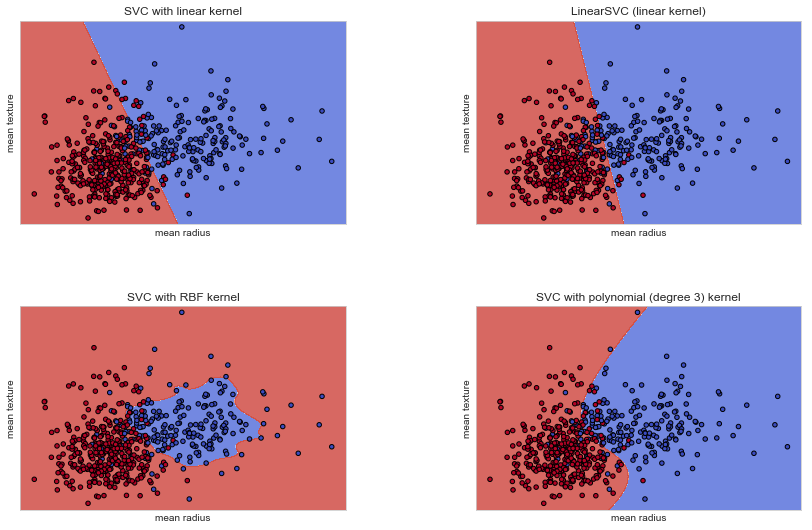

In [48]:
show_C_effect(C=0.1)

In [ ]:
show_C_effect(C=5)

### Regresión Logística

In [24]:
y_test_pred = logireg.predict(x_v)
y_train_pred = logireg.predict(x_t)

lr_acc=accuracy_score(y_test_pred,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_v)*100))

print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_v))

Train Set Accuracy:88.79120879120879
Test Set Accuracy:90.35087719298247

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        38
           1       0.96      0.89      0.93        76

   micro avg       0.90      0.90      0.90       114
   macro avg       0.89      0.91      0.89       114
weighted avg       0.91      0.90      0.90       114



### SVC

In [12]:
y_test_pred2 = svc.predict(x_v)
y_train_pred2=svc.predict(x_t)

svc_acc=accuracy_score(y_test_pred2,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_v))

Train Set Accuracy:94.72527472527472
Test Set Accuracy:81.57894736842105

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        51
           1       0.85      0.81      0.83        63

   micro avg       0.82      0.82      0.82       114
   macro avg       0.81      0.82      0.81       114
weighted avg       0.82      0.82      0.82       114



### KNN

In [29]:
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_t,y_t)

y_test_pred3 = knn.predict(x_v)
y_train_pred3 = knn.predict(x_t)

knn_acc=accuracy_score(y_test_pred3,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_v))

Train Set Accuracy:89.67032967032968
Test Set Accuracy:87.71929824561403

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.92      0.89      0.90        73

   micro avg       0.88      0.88      0.88       114
   macro avg       0.86      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



### Comparacion entre modelos

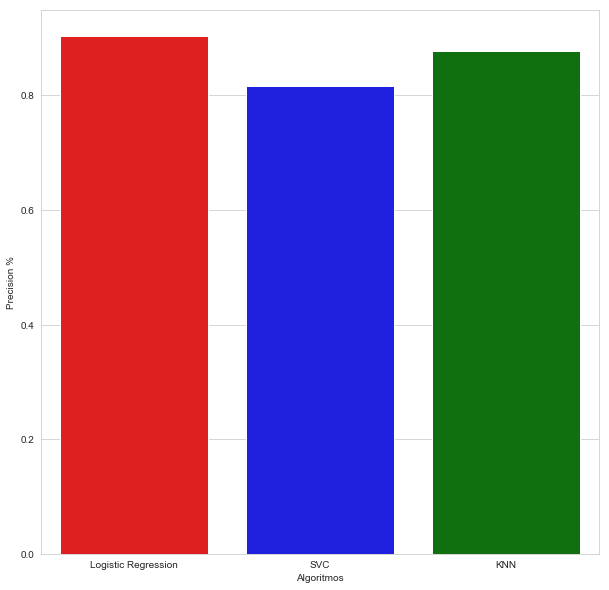

In [34]:
colors = ["red","blue","green"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.ylabel("Precision %")
plt.xlabel("Algoritmos")
sns.barplot(x=['Logistic Regression', 'SVC','KNN'],y=[lr_acc,svc_acc,knn_acc], palette=colors )
plt.show()

# APARTADO A